In [9]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines import PPO2
from stable_baselines.common.vec_env import DummyVecEnv

import matplotlib.pyplot as plt

In [3]:
!python --version

Python 3.7.13


In [4]:
df = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      703 non-null    object
 1   Price     703 non-null    object
 2   Open      703 non-null    object
 3   High      703 non-null    object
 4   Low       703 non-null    object
 5   Vol.      703 non-null    object
 6   Change %  703 non-null    object
dtypes: object(7)
memory usage: 38.6+ KB


In [5]:
df.Price.replace(',','',regex = True, inplace = True)
df.Open.replace(',','',regex = True, inplace = True)
df.High.replace(',','',regex = True, inplace = True)
df.Low.replace(',','',regex = True, inplace = True)
df['Vol.'].replace(to_replace='K', value='', regex=True, inplace = True)
df['Vol.'].replace(to_replace='M', value='', regex=True, inplace = True)
df['Change %'].replace(to_replace='%', value='', regex=True, inplace = True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float, copy = False)
df.Date = pd.to_datetime(df.Date, format = '%b %d, %Y')
df = df.drop(columns=['Change %', 'Vol.'])
df = df.rename(columns = {'Price' : 'Close'})
df.set_index('Date', inplace = True)
df.sort_index(inplace = True)
#df = df.sort_values('Date', ignore_index = True)

df



,Close,Open,High,Low
Date,,,,
2020-03-01,8540.0,8543.8,8737.2,8437.2
2020-03-02,8904.8,8537.5,8961.8,8503.1
2020-03-03,8761.4,8906.1,8911.7,8669.3
2020-03-04,8757.9,8761.3,8840.3,8679.7
2020-03-05,9060.3,8757.9,9147.3,8751.5
...,...,...,...,...
2022-01-28,37745.1,37195.6,37995.9,36176.5
2022-01-29,38170.8,37736.5,38663.7,37350.2
2022-01-30,37917.7,38167.5,38313.3,37390.6


In [6]:
window_size = 50
start_index = window_size + 450
end_index = len(df)


env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

In [10]:
model = PPO2('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



---------------------------------------
| approxkl           | 2.800245e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000196       |
| fps                | 88             |
| n_updates          | 1              |
| policy_entropy     | 0.6931419      |
| policy_loss        | -2.1356856e-05 |
| serial_timesteps   | 128            |
| time_elapsed       | 3.5e-05        |
| total_timesteps    | 128            |
| value_loss         | 6158816.0      |
---------------------------------------
---------------------------------------
| approxkl           | 5.963522e-06   |
| clipfrac           | 0.0            |
| explained_variance | -0.000106      |
| fps                | 695            |
| n_updates          | 2              |
| poli

--------------------------------------
| approxkl           | 2.1417121e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.000343      |
| fps                | 727           |
| n_updates          | 12            |
| policy_entropy     | 0.6878628     |
| policy_loss        | 0.00076955766 |
| serial_timesteps   | 1536          |
| time_elapsed       | 3.26          |
| total_timesteps    | 1536          |
| value_loss         | 2444245.5     |
--------------------------------------
---------------------------------------
| approxkl           | 1.0143986e-05  |
| clipfrac           | 0.0            |
| explained_variance | -0.000116      |
| fps                | 730            |
| n_updates          | 13             |
| policy_entropy     | 0.6877625      |
| policy_loss        | -0.00019659556 |
| serial_timesteps   | 1664           |
| time_elapsed       | 3.44           |
| total_timesteps    | 1664           |
| value_loss         | 4012059.0      |
-------------

---------------------------------------
| approxkl           | 9.929188e-06   |
| clipfrac           | 0.0            |
| explained_variance | 0.000185       |
| fps                | 730            |
| n_updates          | 29             |
| policy_entropy     | 0.69304806     |
| policy_loss        | -0.00020864792 |
| serial_timesteps   | 3712           |
| time_elapsed       | 6.22           |
| total_timesteps    | 3712           |
| value_loss         | 6215686.0      |
---------------------------------------
--------------------------------------
| approxkl           | 1.6369602e-05 |
| clipfrac           | 0.0           |
| explained_variance | -0.000131     |
| fps                | 731           |
| n_updates          | 30            |
| policy_entropy     | 0.6929931     |
| policy_loss        | 0.00018359092 |
| serial_timesteps   | 3840          |
| time_elapsed       | 6.39          |
| total_timesteps    | 3840          |
| value_loss         | 3750155.0     |
------------

--------------------------------------
| approxkl           | 5.359094e-06  |
| clipfrac           | 0.0           |
| explained_variance | 0.000142      |
| fps                | 752           |
| n_updates          | 46            |
| policy_entropy     | 0.6894682     |
| policy_loss        | -0.0001298294 |
| serial_timesteps   | 5888          |
| time_elapsed       | 9.21          |
| total_timesteps    | 5888          |
| value_loss         | 7369212.5     |
--------------------------------------
--------------------------------------
| approxkl           | 0.00016962137 |
| clipfrac           | 0.0           |
| explained_variance | 0.000312      |
| fps                | 753           |
| n_updates          | 47            |
| policy_entropy     | 0.69109356    |
| policy_loss        | -0.0017452205 |
| serial_timesteps   | 6016          |
| time_elapsed       | 9.39          |
| total_timesteps    | 6016          |
| value_loss         | 4601340.5     |
-------------------------

--------------------------------------
| approxkl           | 1.0755082e-09 |
| clipfrac           | 0.0           |
| explained_variance | -0.000144     |
| fps                | 754           |
| n_updates          | 63            |
| policy_entropy     | 0.5906133     |
| policy_loss        | 1.7962884e-07 |
| serial_timesteps   | 8064          |
| time_elapsed       | 12.1          |
| total_timesteps    | 8064          |
| value_loss         | 8866287.0     |
--------------------------------------
---------------------------------------
| approxkl           | 1.3775031e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0.000482       |
| fps                | 756            |
| n_updates          | 64             |
| policy_entropy     | 0.5880743      |
| policy_loss        | -1.0019285e-06 |
| serial_timesteps   | 8192           |
| time_elapsed       | 12.3           |
| total_timesteps    | 8192           |
| value_loss         | 6912720.5      |
-------------

In [17]:
env = env_maker()
observation = env.reset()
rewards = []

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)
    rewards.append(info['total_reward'])

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 19441.5, 'total_profit': 0.8099444197014025, 'position': 0}


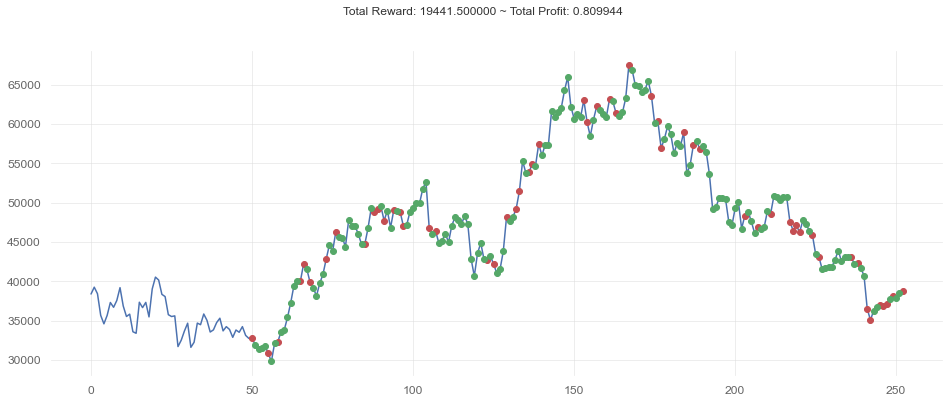

In [18]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()


                           Strategy
-------------------------  ----------
Start Period               2021-07-16
End Period                 2022-02-01
Risk-Free Rate             0.0%
Time in Market             21.0%

Cumulative Return          -19.01%
CAGR﹪                     -31.93%

Sharpe                     -0.33
Prob. Sharpe Ratio         38.54%
Smart Sharpe               -0.33
Sortino                    -0.48
Smart Sortino              -0.48
Sortino/√2                 -0.34
Smart Sortino/√2           -0.34
Omega                      0.88

Max Drawdown               -43.59%
Longest DD Days            78
Volatility (ann.)          47.21%
Calmar                     -0.73
Skew                       0.61
Kurtosis                   16.91

Expected Daily %           -0.1%
Expected Monthly %         -2.6%
Expected Yearly %          -10.0%
Kelly Criterion            -5.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -4.95%
Expected Shortfall (cVaR)  -4.95%

Max Consecutive 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-15,2022-01-29,2022-02-01,78,-43.593068,-43.575812
2,2021-08-18,2021-09-27,2021-10-25,68,-19.983004,-16.783104
3,2021-08-01,2021-08-01,2021-08-06,5,-5.466614,0.000000
4,2021-07-19,2021-07-19,2021-07-22,3,-4.598911,0.000000
5,2021-11-04,2021-11-04,2021-11-08,4,-3.852632,0.000000


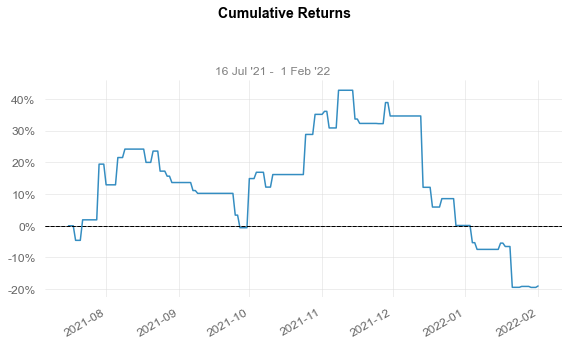

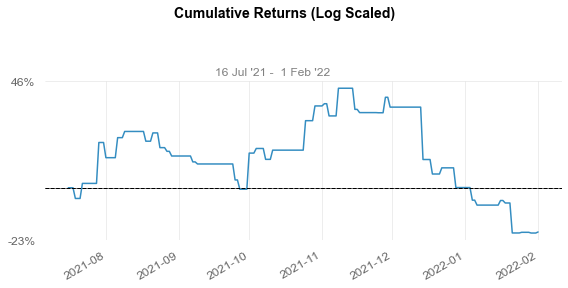

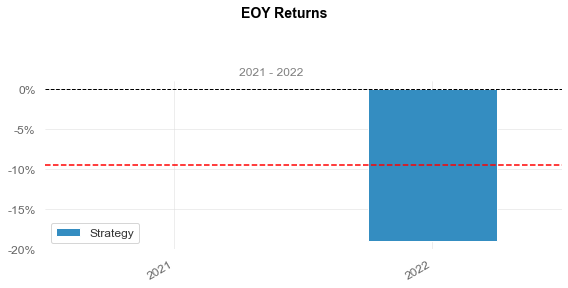

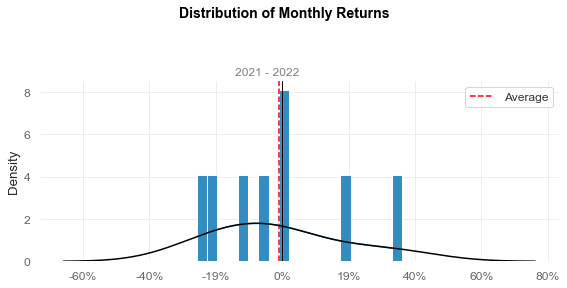

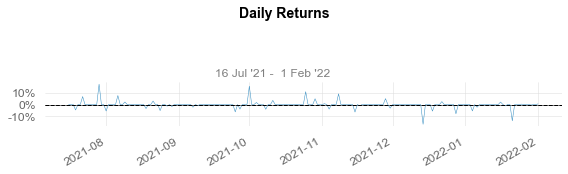

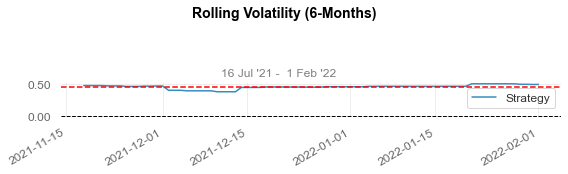

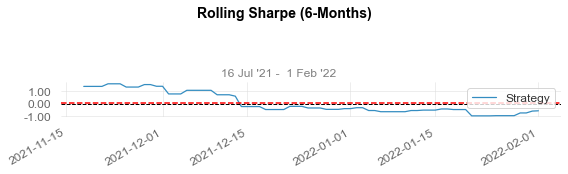

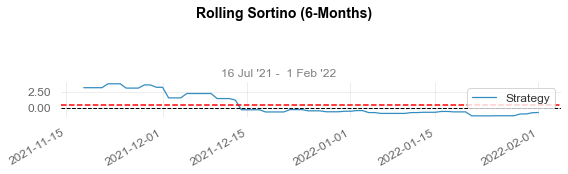

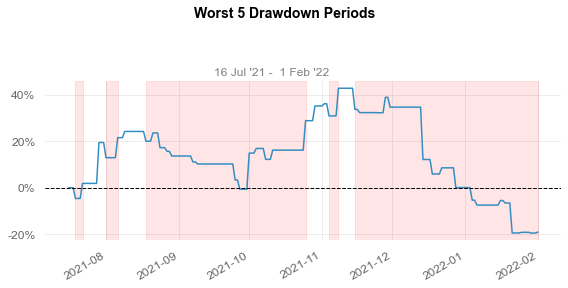

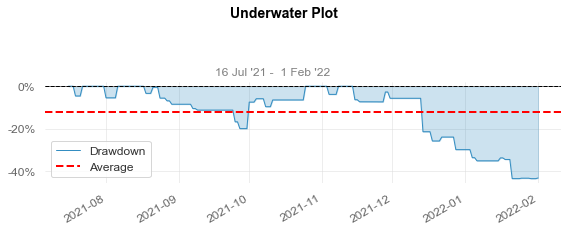

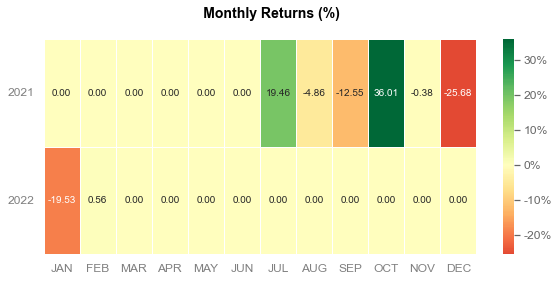

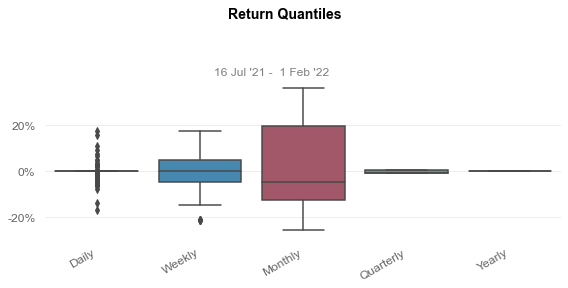

In [19]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_mlplstm_quantstats.html')

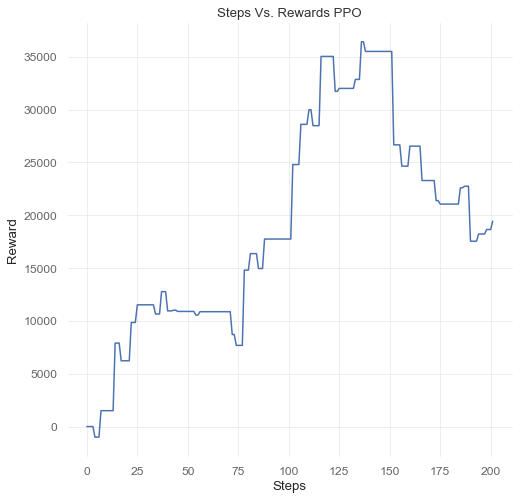

In [25]:
plt.figure(figsize=(8,8))
plt.plot(range(len(rewards)), rewards)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Steps Vs. Rewards PPO')
plt.savefig('ppo_reward.png')